We'll walk through the steps for calculating and plotting variations in sentence lenght over time, looking at the postmodern and post 9/11 American fiction datasets. 

Books are converted to 'book' objects, which is just a nice datatype that I wrote to keep the books organized with their metadata.

In [ ]:
# these are the imports we'll be using
import nltk
from nltk.tokenize import sent_tokenize
import glob
import numpy as np
import matplotlib.pyplot as plt
import book
from scipy.interpolate import interp1d

In [2]:
# read in all the novels in the postmodern corpus
postmodern = []

for filename in glob.glob('postmodern/*.txt'):
    try:
        postmodern.append(book.makebook(open(filename, 'r')))
    except Exception as e:
        print(book)
        
postmodern.sort(key=lambda x: x.year)

In [3]:
# sentence tokenize all the books we read in in the previous block
postmodern_sents = []

for book in postmodern:
    postmodern_sents.append(sent_tokenize(book.text.strip())) # strip removes string escapes
    
# now we'll make sure that things look like they were done correctly
postmodern_sents[5][0]

'A SCREAMING COMES ACROSS THE SKY.'

Looks like everything was done correctly. Now we'll go back through the books and convert each sentence to the number of words in the sentence. Instead of tokenizing again, we'll just count the occurences of ' ' characters,  and add one.

In [4]:
postmodern_sent_len = [[] for book in postmodern_sents]

for n in range(len(postmodern_sents)):
    for sent in postmodern_sents[n]:
        postmodern_sent_len[n].append(sent.count(' ') + 1)

# and now we'll make these into numpy arrays
postmodern_sent_len = [np.array(x) for x in postmodern_sent_len]

# and check that it looks ok, by looking at Gravity's Rainbow again
postmodern_sent_len[5]

array([ 6, 13,  4, ..., 52, 11, 15])

The next step is to calculate the standard deviation in sentence length, and plot it against time. Numpy arrays have a standard deviation method built in, which we'll be using.

For reference, sttdev is $\sqrt{\frac{1}{N}\sum_{i=1}^{N} (x_i - \mu)^2}$

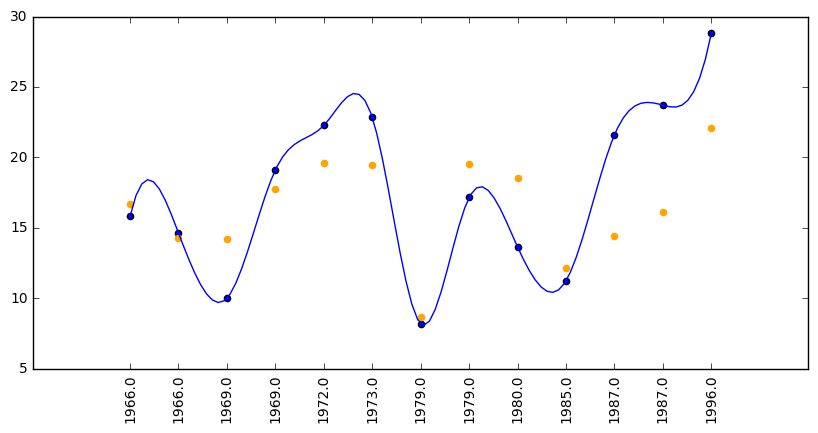

In [24]:
postmodern_sent_len_dev = [np.std(n) for n in postmodern_sent_len]
postmodern_sent_len_mean = [np.mean(n) for n in postmodern_sent_len]
dates = [book.year for book in postmodern]
x = np.arange(len(dates))
y = np.array(postmodern_sent_len_dev)
y1 = np.array(postmodern_sent_len_mean)
xlabel = dates

f_dev = interp1d(x, y, kind='cubic')
x0 = np.linspace(0,len(dates)-1,100)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(211)
ax.scatter(x,y)
ax.scatter(x,y1, color='orange')
ax.plot(x0,f_dev(x0))
plt.xticks(x, dates, rotation='vertical')
plt.show()

Nothing conclusive is happening with this data in terms of variation over time. We're looking for defining features of genre that might not be shown in a linear representation, so we'll just pull out the relevant numerical information for reference. 

In [6]:
print("Mean sentence length: {}".format(np.mean(y1)))
print("Mean stddev of sentence length: {}".format(np.mean(y)))

Mean sentence length: 16.43461825171628
Mean stddev of sentence length: 17.62136358989969


And now we do the same thing for Post 9/11 fiction:

In [9]:
post911 = []
post911_sents = []

for filename in glob.glob('post911/*.txt'):
    try:
        post911.append(book.makebook(open(filename, 'r')))
    except Exception as e:
        print(book)
        
post911.sort(key=lambda x: x.year)

for book in post911:
    post911_sents.append(sent_tokenize(book.text.strip()))

post911_sent_len = [[] for book in post911_sents]

for n in range(len(post911_sents)):
    for sent in post911_sents[n]:
        post911_sent_len[n].append(sent.count(' ') + 1)

post911_sent_len = [np.array(x) for x in post911_sent_len]

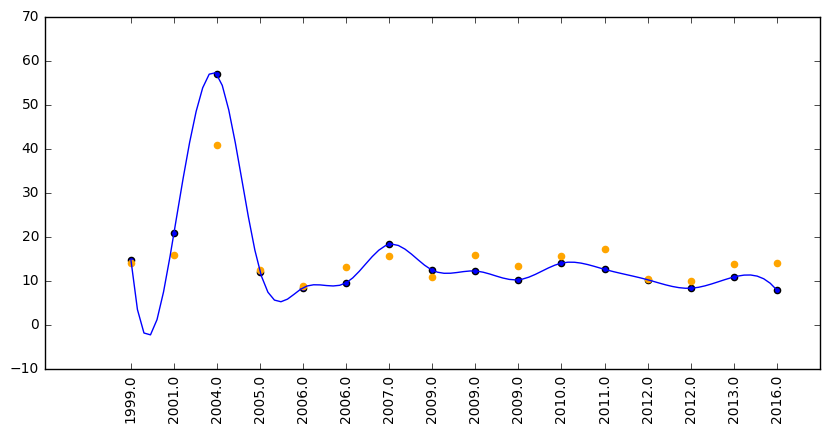

In [27]:
post911_sent_len_dev = [np.std(n) for n in post911_sent_len]
post911_sent_len_mean = [np.mean(n) for n in post911_sent_len]
dates1 = [book.year for book in post911]
a = np.arange(len(dates1))
b = np.array(post911_sent_len_dev)
b1 = np.array(post911_sent_len_mean)

f_dev = interp1d(a, b, kind='cubic')
x0 = np.linspace(0,len(dates1)-1,100)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(211)
ax.scatter(a,b)
ax.scatter(a,b1, color='orange')
ax.plot(x0,f_dev(x0))
plt.xticks(a, dates1, rotation='vertical')
plt.show()

I'm shocked at how different this data looks. Firstly, the data appears almost sinusoidal, especially after 2006. It also looks like election years are sites for local maxima or minima.

In [16]:
print("Mean sentence length: {}".format(np.mean(b1)))
print("Mean stddev of sentence length: {}".format(np.mean(b)))

Mean sentence length: 15.131563339151224
Mean stddev of sentence length: 14.969679005514415


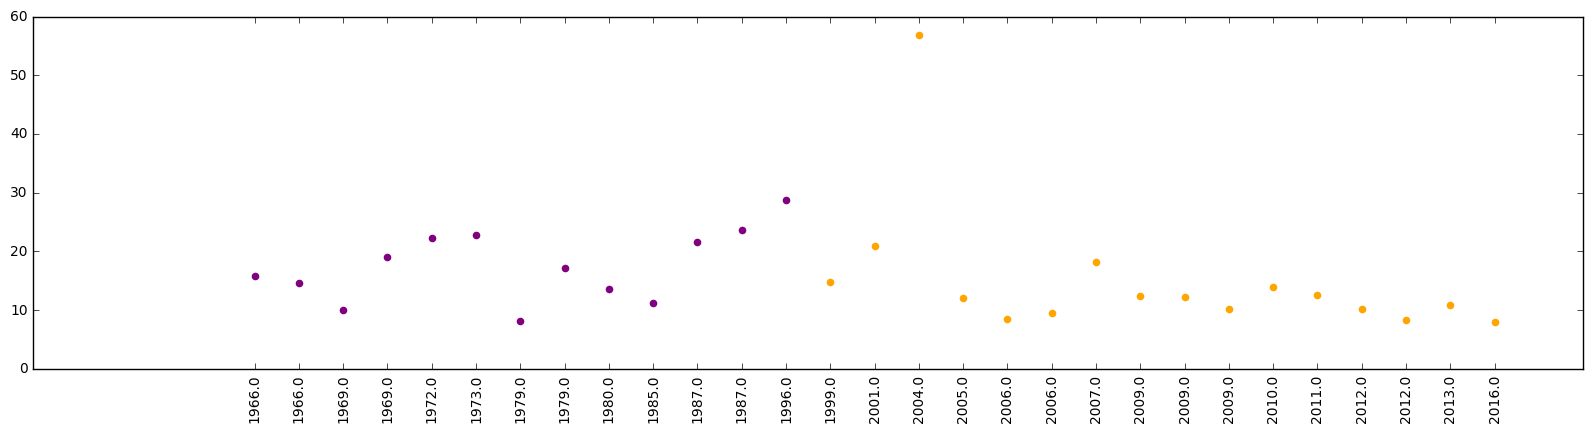

In [19]:
f = np.arange(len(a) + len(x))
ydif = [np.nan for n in range(len(a))]
bdif = [np.nan for n in range(len(y))]
ynew = np.concatenate((y, ydif))
bnew = np.concatenate((bdif,b))
# g = np.concatenate((y, b))
# g1 = np.concatenate((y1, b1))

newdates = dates+dates1

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(211)
ax.scatter(f,ynew,color='purple')
ax.scatter(f,bnew,color='orange')
plt.xticks(f, newdates, rotation='vertical')
plt.show()